### Histograms and Probabilities

In [10]:
import numpy as np

n = np.random.randint(0, 10, 10000)
h = np.bincount(n)
h

array([ 935, 1003, 1045, 1033, 1058,  969,  985, 1040,  991,  941])

In [11]:
h = h/h.sum()
h

array([0.0935, 0.1003, 0.1045, 0.1033, 0.1058, 0.0969, 0.0985, 0.104 ,
       0.0991, 0.0941])

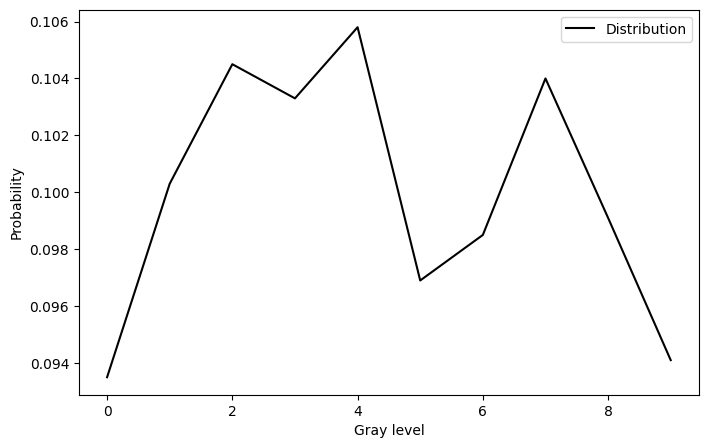

In [15]:
import matplotlib.pyplot as plt

x = np.arange(len(h))

plt.figure(figsize=(8, 5))
plt.plot(x, h, linewidth=1.5, color='black', label='Distribution')
plt.xlabel("Gray level")
plt.ylabel("Probability")
plt.legend()
plt.show()

### The Binomial Distribution

In [6]:
t = np.random.binomial(5, 0.3, size=1000)
s = np.bincount(t)
s

array([172, 370, 306, 128,  24])

In [7]:
s/s.sum()

array([0.172, 0.37 , 0.306, 0.128, 0.024])

### The Bernoulli Distribution

In [3]:
import numpy as np

t = np.random.binomial(1, 0.5, size=1000)
np.bincount(t)

array([503, 497])

In [4]:
t = np.random.binomial(1, 0.3, size=1000)
np.bincount(t)

array([691, 309])

### The Poisson Distribution

In [6]:
t = np.random.poisson(5, size=1000)
s = np.bincount(t)
s

array([  7,  43,  81, 155, 182, 171, 148,  88,  62,  29,  14,   6,   9,
         2,   1,   2])

In [7]:
t.max()

np.int64(15)

In [8]:
s = s / s.sum()
s

array([0.007, 0.043, 0.081, 0.155, 0.182, 0.171, 0.148, 0.088, 0.062,
       0.029, 0.014, 0.006, 0.009, 0.002, 0.001, 0.002])

### The Fast Loaded Dice Roller

In [1]:
from fldr import fldr_preprocess_float_c
from fldr import fldr_sample
import numpy as np

x = fldr_preprocess_float_c([0.6, 0.2, 0.1, 0.1])
t = [fldr_sample(x) for i in range(1000)]
np.bincount(t)

array([601, 185, 104, 110])

In [3]:
from skimage import data

im = data.astronaut()
b = np.bincount(im.ravel(), minlength=256)
b = b / b.sum()
x = fldr_preprocess_float_c(list(b))
t = [fldr_sample(x) for i in range(25000)]
q = np.bincount(t, minlength=256)
q = q / q.sum()
q

array([0.1102 , 0.01816, 0.01128, 0.00652, 0.00608, 0.00484, 0.00528,
       0.00612, 0.00532, 0.00504, 0.00492, 0.00448, 0.00452, 0.00388,
       0.0036 , 0.0038 , 0.00384, 0.00264, 0.00292, 0.00332, 0.00344,
       0.00276, 0.0032 , 0.00316, 0.00392, 0.00332, 0.00368, 0.00288,
       0.00304, 0.0034 , 0.003  , 0.003  , 0.00232, 0.00152, 0.00184,
       0.00208, 0.00284, 0.00208, 0.00248, 0.00228, 0.0016 , 0.0022 ,
       0.0026 , 0.0018 , 0.00216, 0.00256, 0.00212, 0.00272, 0.00292,
       0.00224, 0.00256, 0.00188, 0.00328, 0.00196, 0.00248, 0.00256,
       0.00192, 0.00272, 0.00268, 0.00276, 0.00252, 0.00264, 0.0028 ,
       0.00284, 0.00308, 0.00316, 0.00272, 0.00256, 0.0034 , 0.0026 ,
       0.003  , 0.00292, 0.0026 , 0.0028 , 0.00256, 0.0026 , 0.00356,
       0.0038 , 0.00368, 0.00356, 0.00364, 0.00348, 0.0032 , 0.00324,
       0.00332, 0.00348, 0.00308, 0.00324, 0.00312, 0.00256, 0.00328,
       0.00384, 0.00288, 0.00296, 0.00292, 0.00284, 0.00312, 0.00248,
       0.0026 , 0.00

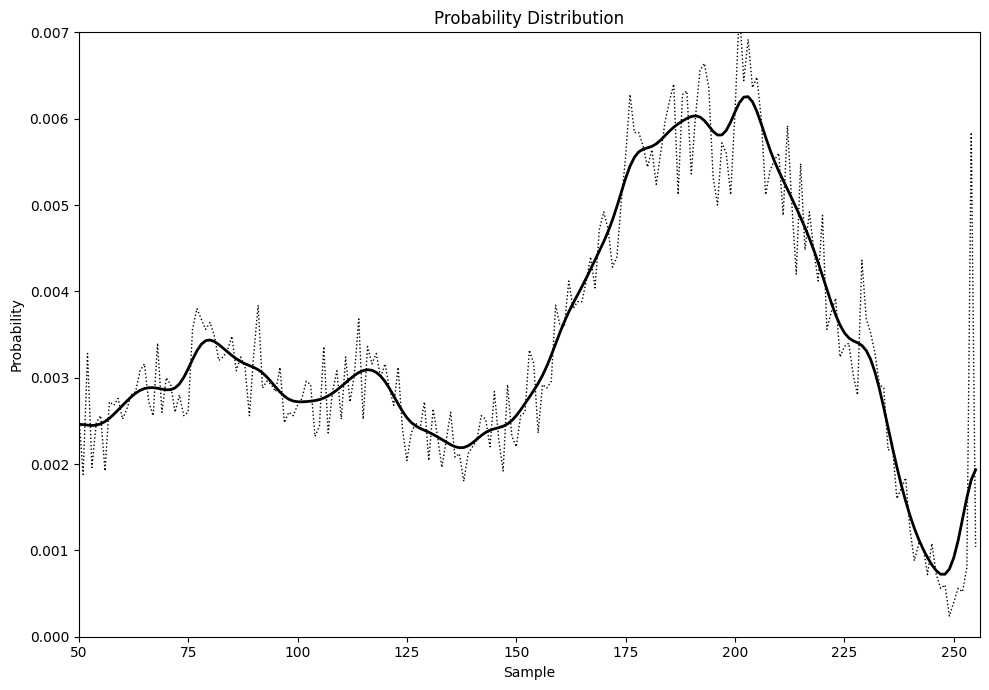

In [14]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

smooth = gaussian_filter1d(q, sigma=3)

plt.figure(figsize=(10,7))
plt.plot(q, 'k:', linewidth=1)
plt.plot(smooth, 'k-', linewidth=2)
plt.xlabel("Sample")
plt.ylabel("Probability")
plt.xlim(50, len(q))
plt.ylim(0, 0.007)
plt.title("Probability Distribution")
plt.grid(False)
plt.tight_layout()

plt.show()

### Continuous Probability Distributions

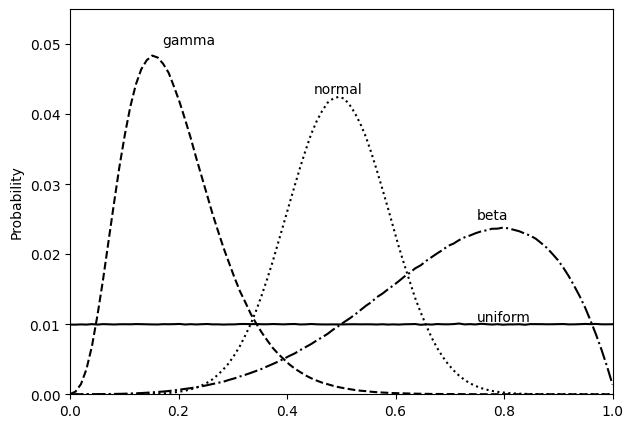

In [8]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000000
B = 100

t = np.random.random(N)
u = np.histogram(t, bins=B)[0]
u = u / u.sum()

t = np.random.normal(0, 1, size=N)
n = np.histogram(t, bins=B)[0]
n = n / n.sum()

t = np.random.gamma(5.0, size=N)
g = np.histogram(t, bins=B)[0]
g = g / g.sum()

t = np.random.beta(5, 2, size=N)
b = np.histogram(t, bins=B)[0]
b = b / b.sum()

# plot
x = np.linspace(0, 1, 100)
uniform = u
normal = n
gamma = g
beta = b

plt.figure(figsize=(7,5))

plt.plot(x, uniform, linestyle='-', color='black', label="uniform")
plt.plot(x, normal, linestyle=':', color='black', label="normal")
plt.plot(x, gamma, linestyle='--', color='black', label="gamma")
plt.plot(x, beta, linestyle='-.', color='black', label="beta")

plt.text(0.17, 0.05, "gamma")
plt.text(0.45, 0.043, "normal")
plt.text(0.75, 0.025, "beta")
plt.text(0.75, 0.0105, "uniform")

plt.xlim(0, 1)
plt.ylim(0, 0.055)
plt.ylabel("Probability")

plt.show()

### Central Limit Theorem

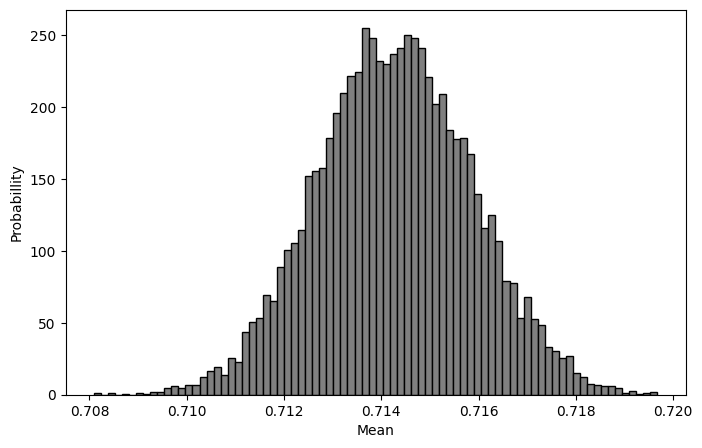

In [7]:
M = 10000
m = np.zeros(M)
for i in range(M):
    t = np.random.beta(5,2,size=M)
    m[i] = t.mean()

plt.figure(figsize=(8, 5))
plt.hist(m, bins=80, density=True, color='gray', edgecolor='black')
plt.xlabel("Mean")
plt.ylabel("Probabillity")
plt.grid(False)
plt.show()